In [31]:
# Make all numpy available via shorter 'num' prefix
import numpy as np
import numpy.matlib as M
from numpy.matlib import rand,zeros,ones,empty,eye
import matplotlib as mpl
from scipy import linalg
from scipy import misc
from sklearn import mixture
import matplotlib.pyplot as plt
import matplotlib as mpl
from numpy import genfromtxt
from sklearn import mixture
from pylab import *
from sklearn.decomposition import PCA
from pandas import DataFrame
from sklearn import linear_model
import statsmodels.api as sm

from itertools import cycle, islice
import pandas

np.random.seed(3)

In [32]:
# Load 100 samples and their labels
    
X_train = np.genfromtxt("./xtrain.csv", dtype=float, delimiter=',') 
X_test = np.genfromtxt("./xtest.csv", dtype=float, delimiter=',') 
Y_train = np.genfromtxt("./ytrain.csv", dtype=float, delimiter=',') 
Y_test = np.genfromtxt("./ytest.csv", dtype=float, delimiter=',') 

In [33]:
Ex = np.genfromtxt('./20samples Original/Ex.csv', dtype=float, delimiter=',')
Em = np.genfromtxt('./20samples Original/Em.csv', dtype=float, delimiter=',')
import pandas
df = pandas.read_csv('./20labels Original/PAHs.csv')
index_col='Acronyms'
leg = df[index_col][:16]
lst = list(leg)

In [34]:
fsize = 33
n = int(np.around(Ex.size/fsize))
Ex_new = zeros(fsize)
for i in range(fsize):
    Ex_new[i] = np.mean(Ex[i*n+1:(i+1)*n])
    
fsize = 100
n = int(np.around(Em.size/fsize))
Em_new = zeros(fsize)
for i in range(fsize):
    Em_new[i] = np.mean(Em[i*n+1:(i+1)*n])


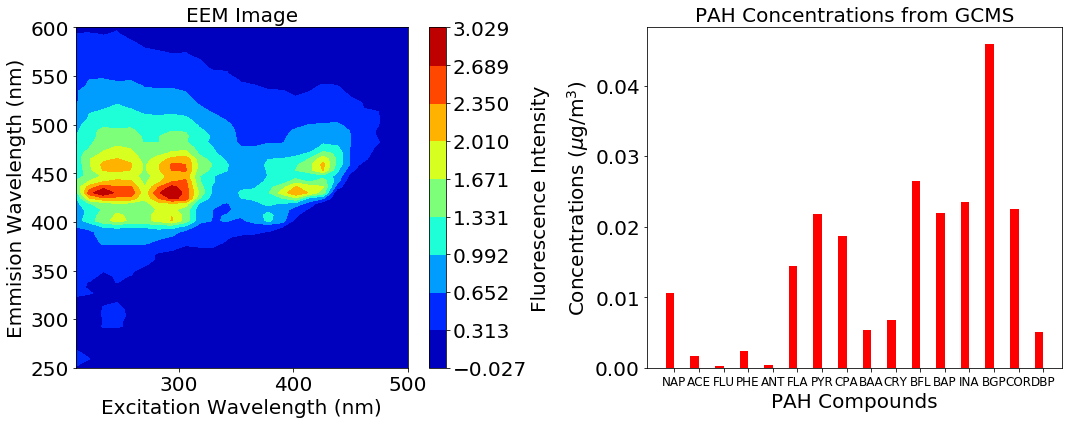

In [36]:
from matplotlib import cm
mpl.rc('image', cmap='jet')

f1 = plt.figure(figsize=(15,6))

levels=linspace(min(X_train[25,:]),max(X_train[25,:]),10)
ax = f1.add_subplot(1,2,1)
eem = np.reshape(X_train[25,:],(100,33))
cont = ax.contourf(Ex_new,Em_new,eem,levels)
ax.set_xlim([210,500])
ax.set_ylim([250,600])
ax.set_title('EEM Image',fontsize=20)
ax.set_ylabel('Emmision Wavelength (nm)',fontsize=20)
ax.set_xlabel('Excitation Wavelength (nm)',fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
cbar = f1.colorbar(cont)
cbar.ax.set_ylabel('Fluorescence Intensity',fontsize=20)
cbar.ax.tick_params(axis='y', labelsize=20)

ax = f1.add_subplot(1,2,2)
df1 = ax.bar(np.arange(16),Y_train[25,:],0.35,color='red',label='Test Samples Original')
ax.set_ylabel('Concentrations ($\mu$g/m$^{3}$)',fontsize=20)
ax.set_xlabel('PAH Compounds',fontsize=20)
ax.set_xticks(np.arange(16)+0.35*np.ones(16)/2)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=20)
ax.set_xticklabels(lst)
ax.set_title('PAH Concentrations from GCMS',fontsize=20)
    
    
plt.tight_layout()
plt.show()


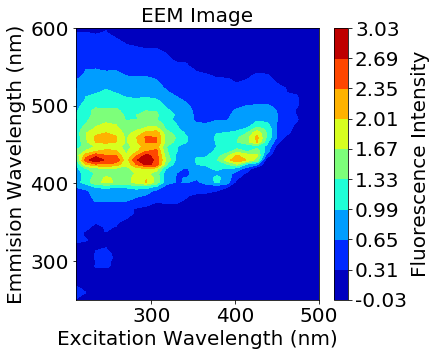

In [37]:
from matplotlib import cm
import matplotlib.ticker as ticker
mpl.rc('image', cmap='jet')

def myfmt(x, pos):
    return '{0:.2f}'.format(x)


f3 = plt.figure(figsize=(12,5))

levels=linspace(min(X_train[25,:]),max(X_train[25,:]),10)
ax = f3.add_subplot(1,2,1)
eem = np.reshape(X_train[25,:],(100,33))
cont = ax.contourf(Ex_new,Em_new,eem,levels)
ax.set_xlim([210,500])
ax.set_ylim([250,600])
ax.set_title('EEM Image',fontsize=20)
ax.set_ylabel('Emmision Wavelength (nm)',fontsize=20)
ax.set_xlabel('Excitation Wavelength (nm)',fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
cbar = f3.colorbar(cont, format=ticker.FuncFormatter(myfmt))
cbar.ax.set_ylabel('Fluorescence Intensity',fontsize=20)
cbar.ax.tick_params(axis='y', labelsize=20)


Text(0.5,1,'PAH Concentrations from GCMS')

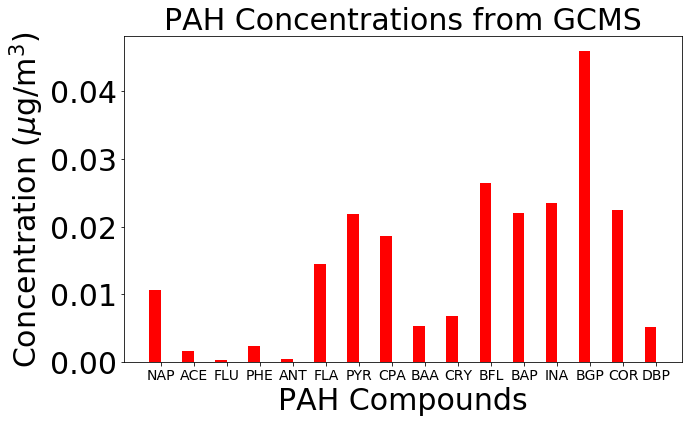

In [38]:
from matplotlib import cm
mpl.rc('image', cmap='jet')

f2 = plt.figure(figsize=(10,6))

ax = f2.add_subplot(1,1,1)
df1 = ax.bar(np.arange(16),Y_train[25,:],0.35,color='red',label='Test Samples Original')
ax.set_ylabel('Concentration ($\mu$g/m$^{3}$)',fontsize=30)
ax.set_xlabel('PAH Compounds',fontsize=30)
ax.set_xticks(np.arange(16)+0.35*np.ones(16)/2)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=30)
ax.set_xticklabels(lst)
ax.set_title('PAH Concentrations from GCMS',fontsize=30)


In [39]:
# Demean data

M = X_train.mean(0)
X_train = X_train - np.array([M,]*600)

X_test = X_test - np.array([M,]*150)

In [40]:
from sklearn.decomposition import PCA

pca = PCA()  
scores = pca.fit_transform(X_train)  
comps = pca.components_

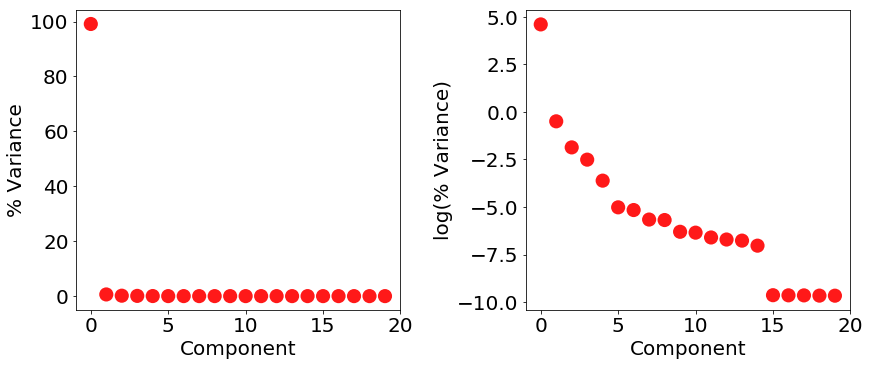

In [41]:
D = pca.explained_variance_
f2 = plt.figure(figsize=(12,5))
ax = f2.add_subplot(1,2,1)
ax.scatter(range(20),100*np.divide(D[:20],sum(D[:20])),s=200,marker="o",c='r',alpha=0.9,edgecolors='none')
ax.set_ylabel('% Variance',fontsize=20)
ax.set_xlabel('Component',fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

ax2 = f2.add_subplot(1,2,2)
ax2.scatter(range(20),log(100*np.divide(D[:20],sum(D[:20]))),s=200,marker="o",c='r',alpha=0.9,edgecolors='none')
ax2.set_ylabel('log(% Variance)',fontsize=20)
ax2.set_xlabel('Component',fontsize=20)
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)

plt.tight_layout(pad=0.4, w_pad=4, h_pad=1.0)
    
plt.show()

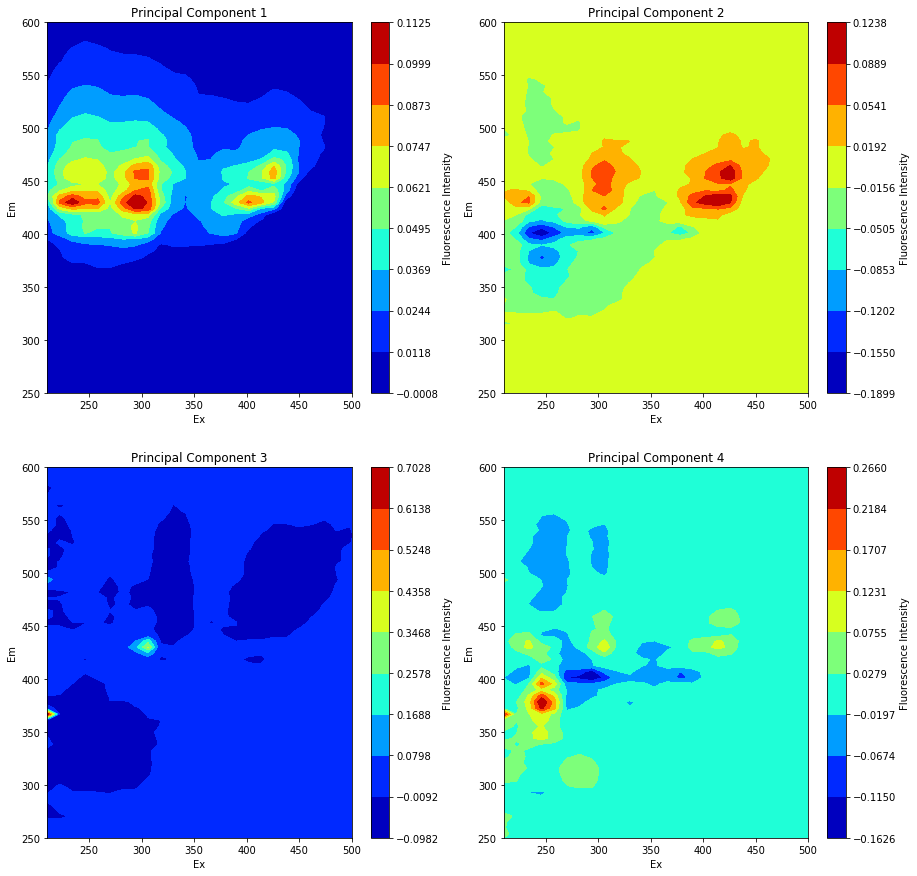

In [42]:
# Plotting first four principal components

f2 = plt.figure(figsize=(15,15))
for i in range(4):
    levels=linspace(min(comps[i,:]),max(comps[i,:]),10)
    ax = f2.add_subplot(2,2,i+1)
    eem = np.reshape(comps[i,:],(100,33))
    cont = ax.contourf(Ex_new,Em_new,eem,levels)
    ax.set_xlim([210,500])
    ax.set_ylim([250,600])
    ax.set_title('Principal Component %s' %(i+1))
    ax.set_ylabel('Em')
    ax.set_xlabel('Ex')
    cbar = f2.colorbar(cont)
    cbar.ax.set_ylabel('Fluorescence Intensity')

plt.show()

In [43]:
scores_test = pca.transform(X_test)  

In [44]:
pca_dim = 10

regr = linear_model.LinearRegression()
xtrain = scores[:,:pca_dim]
ytrain = Y_train
xtest = scores_test[:,:pca_dim]
ytest = Y_test
lm = linear_model.LinearRegression()
model = lm.fit(xtrain,ytrain)

ypred_train = lm.predict(xtrain)

err = np.zeros((ytrain[:,0].size,ytrain[0,:].size))
for i in range(ytrain[:,0].size):
    for j in range(ytrain[0,:].size):
        err[i,j] = np.absolute(ytrain[i,j]-ypred_train[i,j])
err_train = 100*np.divide(np.sum(err,axis=0),np.sum(ytrain,axis=0))
    
    
            
ypred_test = lm.predict(xtest)

err = np.zeros((ytest[:,0].size,ytest[0,:].size))
for i in range(ytest[:,0].size):
    for j in range(ytest[0,:].size):
        err[i,j] = np.absolute(ytest[i,j]-ypred_test[i,j])
err_test = 100*np.divide(np.sum(err,axis=0),np.sum(ytest,axis=0))

In [45]:
err_train

array([12.57615421,  9.59507324,  7.07625439,  3.13251228,  4.16792905,
        4.86052702,  4.3748847 ,  1.54698065,  2.22858737,  2.89504842,
        1.14162107,  0.604353  ,  0.23834336,  0.33130713,  0.27622887,
        0.3557938 ])

In [46]:
err_test

array([69.4209389 , 49.19431667, 21.65184485, 14.72173566, 16.7843381 ,
       63.80702992, 57.96948672, 26.39430561, 51.87960832, 44.56747963,
       20.42010967, 16.83918417, 15.77321208, 14.31729285, 29.97403425,
       16.16199521])

In [47]:
sum(err_test)/16

33.117307037953026

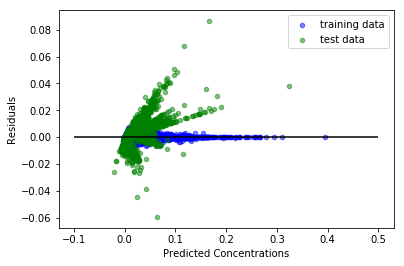

In [48]:
plt.scatter(ypred_train,ypred_train-ytrain,c='b',s=20,alpha=0.5)
plt.scatter(ypred_test,ypred_test-ytest,c='g',s=20,alpha=0.5)
plt.hlines(y=0,xmin=-0.1,xmax=0.5)
plt.xlabel('Predicted Concentrations')
plt.ylabel('Residuals')
plt.legend(['training data','test data'])

In [49]:
err_test

array([69.4209389 , 49.19431667, 21.65184485, 14.72173566, 16.7843381 ,
       63.80702992, 57.96948672, 26.39430561, 51.87960832, 44.56747963,
       20.42010967, 16.83918417, 15.77321208, 14.31729285, 29.97403425,
       16.16199521])

In [50]:
lm.score(xtest,ytest)

0.7875505073722981

In [51]:
# zero negative predictions
for i in range(ypred_train[:,0].size):
    for j in range(ypred_train[0,:].size):
        if ypred_train[i,j] < 0:
            ypred_train[i,j]=0
            
for i in range(ypred_test[:,0].size):
    for j in range(ypred_test[0,:].size):
        if ypred_test[i,j] < 0:
            ypred_test[i,j]=0

In [52]:
np.min(ypred_test)

0.0

In [53]:
np.resize(Ex,33)

array([600., 598., 596., 594., 592., 590., 588., 586., 584., 582., 580.,
       578., 576., 574., 572., 570., 568., 566., 564., 562., 560., 558.,
       556., 554., 552., 550., 548., 546., 544., 542., 540., 538., 536.])

In [54]:
col = [(3,78,123),
(5,112,176),
(54,144,192),
(116,169,207),
(166,189,219),
(208,209,230),
(236,231,242),
(199,234,229),
(217,239,139),
(255,247,188),
(254,227,145),
(254,196,79),
(254,153,41),
(236,112,20),
(204,76,2),
(140,45,4)]
col = np.divide(col,255);

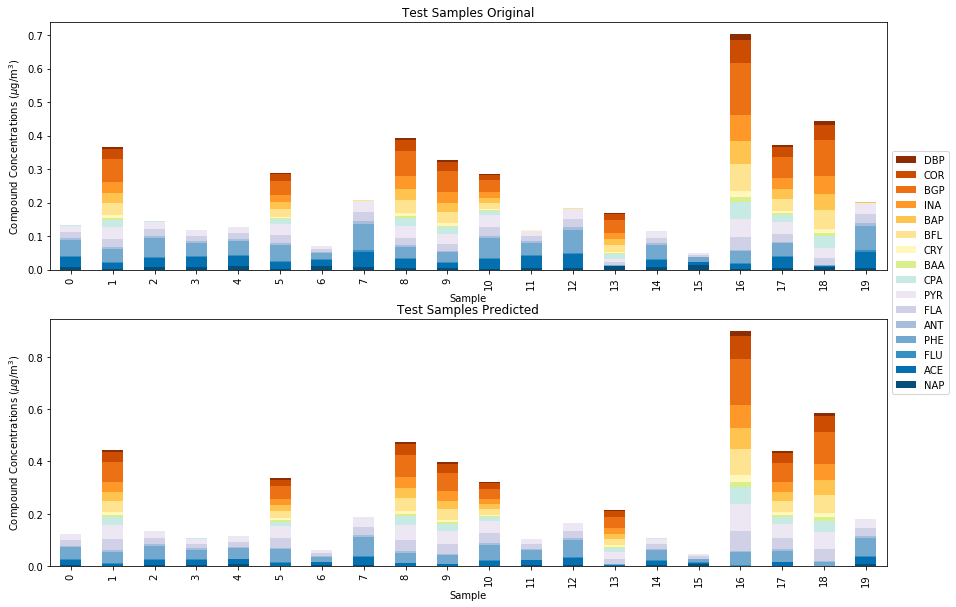

In [55]:

f3 = plt.figure(figsize=(15,10))
ax1 = f3.add_subplot(2,1,1)
df1 = pandas.DataFrame(ytest[:20,:])
df1.plot(kind='bar', stacked=True, color=col,ax=ax1)
ax1.set_title('Test Samples Original')
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(reversed(handles), reversed(lst), loc='upper left',bbox_to_anchor=(1, 0.5))
ax1.set_ylabel('Compound Concentrations ($\mu$g/m$^{3}$)')
ax1.set_xlabel('Sample')

ax2 = f3.add_subplot(2,1,2)
df2 = pandas.DataFrame(ypred_test[:20,:])
df2.plot(kind='bar', stacked=True, color=col,ax=ax2,legend='False')
ax2.set_title('Test Samples Predicted',)
ax2.set_ylabel('Compound Concentrations ($\mu$g/m$^{3}$)')
ax2.set_xlabel('Sample')
ax2.get_legend().remove()

#ax.set_xlim([200,500])
#ax.set_ylim([250,600])
#ax.set_title('Principal Component %s' %(i+1))
#ax.set_ylabel('Em')
#ax.set_xlabel('Ex')
#cbar = f2.colorbar(cont)
#cbar.ax.set_ylabel('Fluorescence Intensity')

C:\Users\IVN\Anaconda2\envs\py35\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: This function is deprecated. Please call randint(0, 149 + 1) instead
  


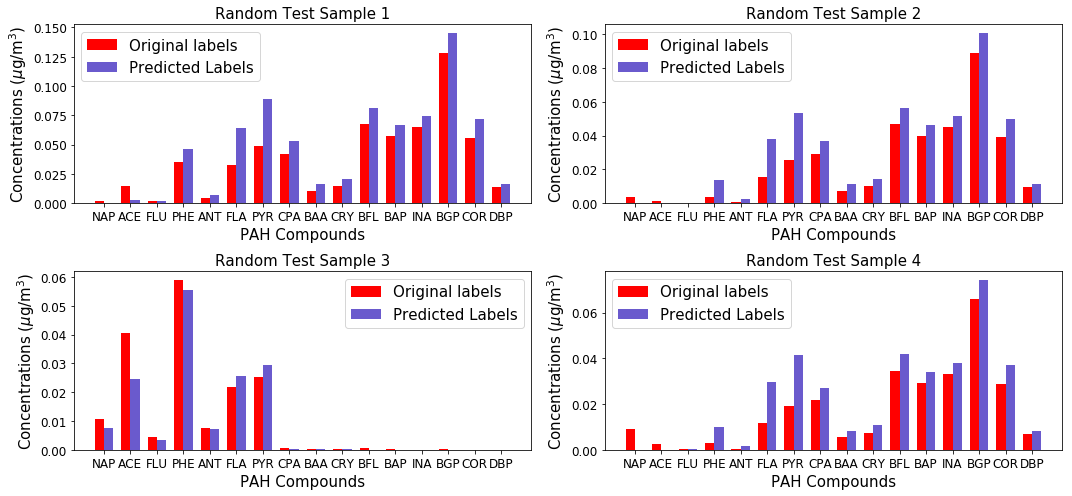

In [56]:

from matplotlib.ticker import MaxNLocator
from collections import namedtuple

np.random.seed(6)
idr=np.random.random_integers(0,ytest[:,0].size-1,size=(4,))

f4 = plt.figure(figsize=(15,7))
ax = [f4.add_subplot(2,2,i+1) for i in range(4)]
i=0;    
for a in ax:
    df1 = a.bar(np.arange(16),ytest[idr[i],:],0.35,color='red',label='Test Samples Original')
    df2 = a.bar(np.arange(16)+0.35*np.ones(16),ypred_test[idr[i],:],0.35,color='slateblue',label='Test Samples Predicted')
    a.set_ylabel('Concentrations ($\mu$g/m$^{3}$)',fontsize=15)
    a.set_xlabel('PAH Compounds',fontsize=15)
    a.set_xticks(np.arange(16)+0.35*np.ones(16)/2)
    a.tick_params(axis='x', labelsize=12)
    a.tick_params(axis='y', labelsize=12)
    a.set_xticklabels(lst)
    a.set_title('Random Test Sample %s' %(i+1),fontsize=15)
    a.legend(('Original labels','Predicted Labels'),fontsize=15)
    i=i+1
plt.tight_layout()


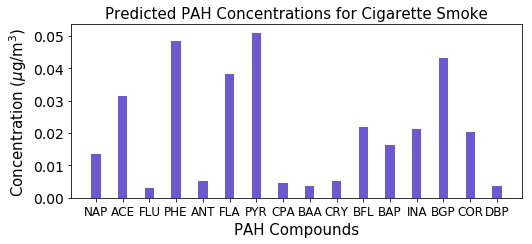

In [57]:

from matplotlib.ticker import MaxNLocator
from collections import namedtuple

np.random.seed(6)

f5 = plt.figure(figsize=(7.5,3.5))
a = f5.add_subplot(1,1,1)

df2 = a.bar(np.arange(16)+0.35*np.ones(16),ypred_train[28,:],0.35,color='slateblue',label='Test Samples Predicted')
a.set_ylabel('Concentration ($\mu$g/m$^{3}$)',fontsize=15)
a.set_xlabel('PAH Compounds',fontsize=15)
a.set_xticks(np.arange(16)+0.35*np.ones(16))
a.tick_params(axis='x', labelsize=12)
a.tick_params(axis='y', labelsize=14)
a.set_xticklabels(lst)
a.set_title('Predicted PAH Concentrations for Cigarette Smoke',fontsize=15)
plt.tight_layout()


In [58]:
neural_test_err = np.array([ 66.13174493,  51.18761333,  94.7017307 ,  59.71304314,
       142.54436817,  80.43994284,  53.01078864,  86.28619464,
        75.66064477,  91.42608545, 104.30913994,  95.61119955,
        84.03079641,  93.71643637,  76.94555714, 107.46187003])


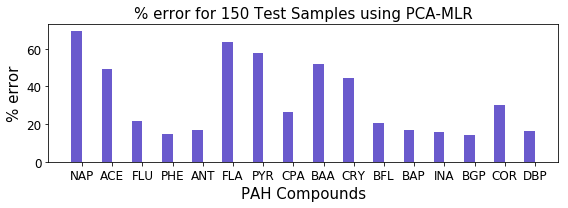

In [59]:
f5 = plt.figure(figsize=(8,3))
ax = f5.add_subplot(1,1,1)

df1 = ax.bar(np.arange(16),err_test,0.35,color='slateblue',label='Test Samples Original')
ax.set_ylabel('% error',fontsize=15)
ax.set_xlabel('PAH Compounds',fontsize=15)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.set_xticks(np.arange(16)+0.35*np.ones(16)/2)
ax.set_xticklabels(lst)
ax.set_title('% error for 150 Test Samples using PCA-MLR',fontsize=15)
plt.tight_layout()


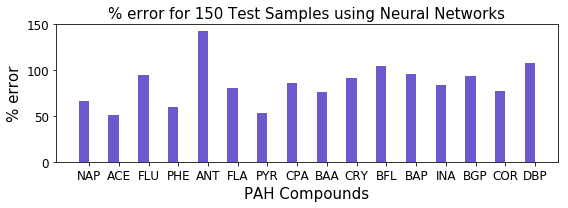

In [60]:
f5 = plt.figure(figsize=(8,3))
ax = f5.add_subplot(1,1,1)

df1 = ax.bar(np.arange(16),neural_test_err,0.35,color='slateblue',label='Test Samples Original')
ax.set_ylabel('% error',fontsize=15)
ax.set_xlabel('PAH Compounds',fontsize=15)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.set_xticks(np.arange(16)+0.35*np.ones(16)/2)
ax.set_xticklabels(lst)
ax.set_title('% error for 150 Test Samples using Neural Networks',fontsize=15)
plt.tight_layout()
